In [1]:
!pip install scikit-learn -q

In [2]:
import sklearn

In [7]:
!pip install pandas

  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.7 MB 6.7 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/9.7 MB 7.0 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.7 MB 8.0 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.7 MB 7.7 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.7 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 7.8 MB/s  0:00:01
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
Using cached tzdata-2025.3-py2.py3-none-any.whl (348 kB)

   ---------

In [15]:
!pip install matplotlib
!pip install seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------------- ------------------ 4.5/8.1 MB 24.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 20.5 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 16.4 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------------- -------------------------- 2.4/7.0 MB 11.9 MB/s eta 0:00:01
   ----------------------------- ---------- 5.2/7.0 MB 12.8 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 12.9 MB/s  0:00:00
Using cached pyparsing-3.3.2-py3-none-any.whl (122 kB)

   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 

In [18]:
import sys
import os

print(f"현재 실행 중인 파이썬 경로: {sys.executable}")
print(f"패키지를 찾는 경로들: {sys.path}")

try:
    import pandas as pd
    print("성공: pandas를 정상적으로 불러왔습니다!")
except ImportError:
    print("실패: 여전히 pandas를 찾을 수 없습니다.")

현재 실행 중인 파이썬 경로: C:\Users\Playdata\AppData\Local\Programs\Python\Python314\python.exe
패키지를 찾는 경로들: ['C:\\Program Files\\JetBrains\\PyCharm 2025.3.1.1\\plugins\\python-ce\\helpers\\jupyter_debug', 'C:\\Program Files\\JetBrains\\PyCharm 2025.3.1.1\\plugins\\python-ce\\helpers\\pydev', 'C:\\p2_mini', 'C:\\Users\\Playdata\\AppData\\Local\\Programs\\Python\\Python314\\python314.zip', 'C:\\Users\\Playdata\\AppData\\Local\\Programs\\Python\\Python314\\DLLs', 'C:\\Users\\Playdata\\AppData\\Local\\Programs\\Python\\Python314\\Lib', 'C:\\Users\\Playdata\\AppData\\Local\\Programs\\Python\\Python314', '', 'C:\\Users\\Playdata\\AppData\\Local\\Programs\\Python\\Python314\\Lib\\site-packages']
성공: pandas를 정상적으로 불러왔습니다!


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
host_country_map = {
    'Seoul': 'KOR', 'London': 'GBR', 'Beijing': 'CHN', # ...
}
# 1. 데이터 로드
df = pd.read_csv('./data/athlete_events.csv')
regions = pd.read_csv('./data/noc_regions.csv')

# 2. NOC-Region 결합
df = pd.merge(df, regions, on='NOC', how='left')

# 3. 개최국 정보 매핑(host_country_map활용)
df['Host_NOC'] = df['City'].map(host_country_map)

# 4. 개최국 여부 (Is_Host) 생성
# 해당 행의 NOC가 개최지 NOC와 같으면 True
df['Is_Host'] = df['NOC'] == df['Host_NOC']

# 5. 메달 데이터 정제
# 1) NaN을 'No Medal'로 채워 시각화할 때 에러를 방지
df['Medal'] = df['Medal'].fillna('None')

# 2) 단체전 메달 중복 계산 방지
# 동일 경기(Games), 동일 연도, 동일 종목(Event), 동일 메달인 경우 1개로 처리
df['Medal_Won'] = df['Medal'].apply(lambda x: 1 if x != 'None' else 0)

# 6. 확인 출력
print(f"개최국 데이터(행) 수: {df['Is_Host'].sum()}건")
print(df[['City', 'Host_NOC', 'Is_Host']].head())

개최국 데이터(행) 수: 3527건
        City Host_NOC  Is_Host
0  Barcelona      NaN    False
1     London      GBR    False
2  Antwerpen      NaN    False
3      Paris      NaN    False
4    Calgary      NaN    False


In [26]:
# 분석 1: 개최국은 메달을 평균 몇 % 더 따는가?

# 국가별/연도별 메달 합계 계산
yearly_medals = df.groupby(['NOC', 'Year', 'Is_Host']).size().reset_index(name='Medal_Count')

# 개최 경험이 있는 국가들만 필터링
hosting_nations = yearly_medals[yearly_medals['Is_Host'] == True]['NOC'].unique()
target_df = yearly_medals[yearly_medals['NOC'].isin(hosting_nations)]

# 평소 성적 vs 개최 성적 비교
performance = target_df.groupby('Is_Host')['Medal_Count'].mean()
increase_pct = ((performance[True] - performance[False]) / performance[False]) * 100

print(f"평소 평균 메달: {performance[False]:.2f}")
print(f"개최 시 평균 메달: {performance[True]:.2f}")
print(f"평균 메달 상승률: {increase_pct:.2f}%")

평소 평균 메달: 241.24
개최 시 평균 메달: 705.40
평균 메달 상승률: 192.41%


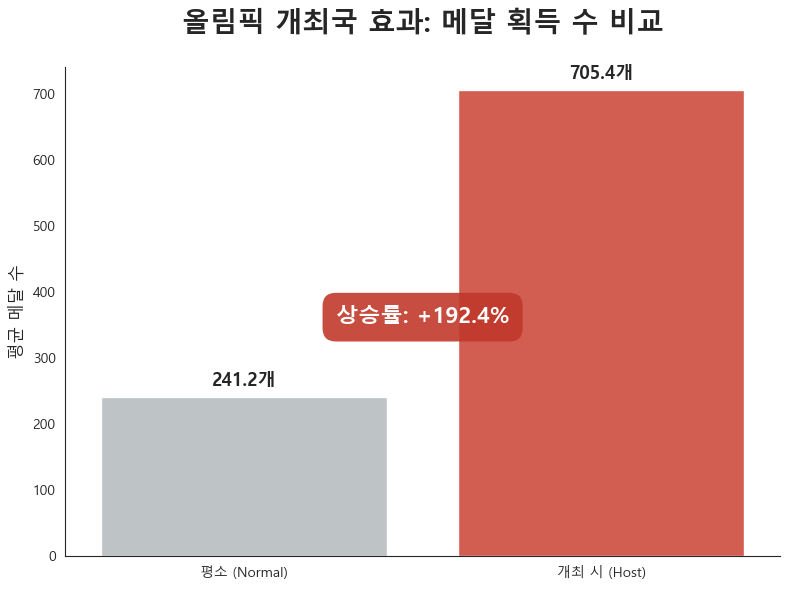

In [45]:
# 데이터 준비
plot_data_1 = performance.reset_index()
plot_data_1['Status'] = plot_data_1['Is_Host'].map({True: '개최 시 (Host)', False: '평소 (Normal)'})

# 스타일 및 한글 설정
sns.set_style("white")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 그래프 그리기
plt.figure(figsize=(8, 6))
colors = {'평소 (Normal)': '#bdc3c7', '개최 시 (Host)': '#e74c3c'}

ax = sns.barplot(data=plot_data_1, x='Status', y='Medal_Count', hue='Status', palette=colors, legend=False)

# 막대 위에 수치 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}개',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=13, fontweight='bold', xytext=(0, 5), textcoords='offset points')

# 상승률 강조 박스
plt.text(0.5, performance[True] * 0.5, f'상승률: +{increase_pct:.1f}%',
         fontsize=16, color='white', fontweight='bold', ha='center',
         bbox=dict(facecolor='#c0392b', alpha=0.9, edgecolor='none', boxstyle='round,pad=0.6'))

plt.title('올림픽 개최국 효과: 메달 획득 수 비교', fontsize=20, pad=25, fontweight='bold')
plt.ylabel('평균 메달 수', fontsize=12)
plt.xlabel('')
sns.despine()

plt.tight_layout()
plt.show()

In [46]:
# 분석 2: 개최 전후 10년의 성적 추이를 보았을 때, 개최 효과는 얼마나 지속되는가?

#  각 국가별 '개최 연도' 테이블 생성
host_years = df[df['Is_Host'] == True][['NOC', 'Year']].drop_duplicates()
host_years.columns = ['NOC', 'Host_Year']

# 메달 데이터와 개최 연도 정보 결합 (yearly_medals는 분석 1에서 생성된 데이터 활용)
# yearly_medals: df.groupby(['NOC', 'Year', 'Is_Host']).size().reset_index(name='Medal_Count')
trend_df = pd.merge(yearly_medals, host_years, on='NOC')

# 개최 연도 기준 상대적 시점 계산 (개최 당해 = 0)
trend_df['Relative_Year'] = trend_df['Year'] - trend_df['Host_Year']

# 개최 전후 12년(-12 ~ +12) 데이터만 필터링
trend_analysis = trend_df[(trend_df['Relative_Year'] >= -12) & (trend_df['Relative_Year'] <= 12)]

# 상대 연도별 평균 메달 수 계산 (시각화에 사용될 데이터)
trend_summary = trend_analysis.groupby('Relative_Year')['Medal_Count'].mean().reset_index()

print("--- 분석 2: 상대 연도별 평균 메달 요약 ---")
print(trend_summary.head())

--- 분석 2: 상대 연도별 평균 메달 요약 ---
   Relative_Year  Medal_Count
0            -12        245.6
1            -10         79.0
2             -8        236.0
3             -6         81.0
4             -4        305.5


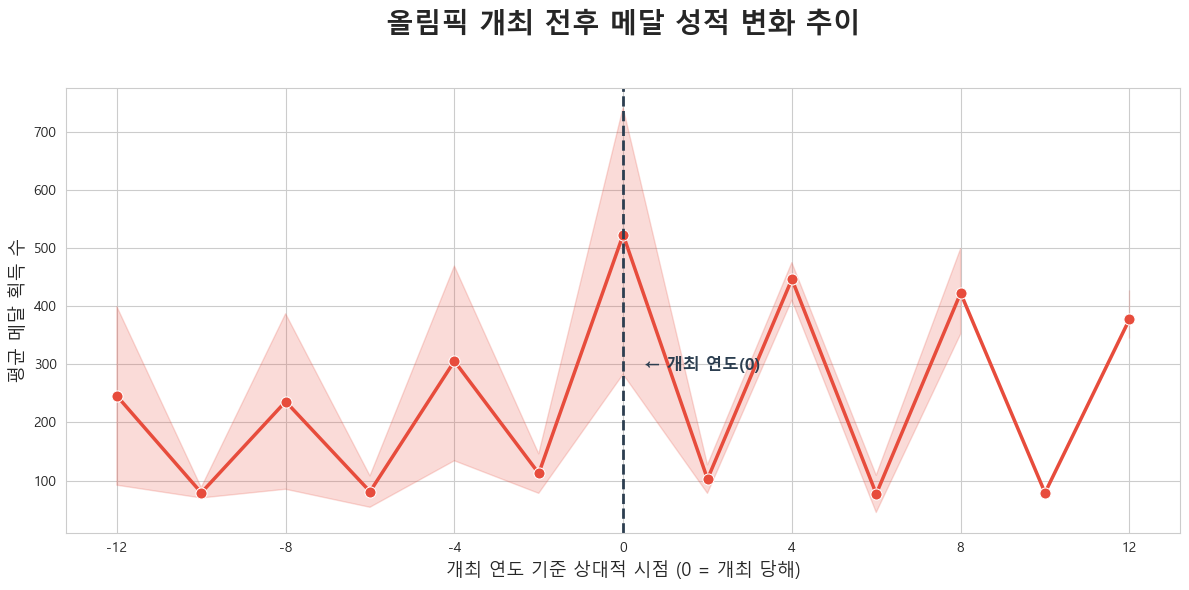

In [49]:
# 한글 폰트 및 스타일 설정
import matplotlib.font_manager as fm

sns.set_style("whitegrid")

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 데이터의 평균적인 흐름을 선 그래프로 표현
sns.lineplot(data=trend_analysis, x='Relative_Year', y='Medal_Count',
             marker='o', markersize=8, color='#e74c3c', linewidth=2.5)

# 개최 연도(0점) 강조선 및 라벨 추가
plt.axvline(0, color='#2c3e50', linestyle='--', linewidth=2)
mid_y = trend_analysis['Medal_Count'].mean()
plt.text(0.5, mid_y, '← 개최 연도(0)',
         fontsize=12, color='#2c3e50', fontweight='bold', va='center')

plt.title('올림픽 개최 전후 메달 성적 변화 추이', fontsize=20, pad=40, fontweight='bold')
plt.xlabel('개최 연도 기준 상대적 시점 (0 = 개최 당해)', fontsize=13)
plt.ylabel('평균 메달 획득 수', fontsize=13)

# X축 눈금을 4년 주기(올림픽 주기)로 설정
plt.xticks(range(-12, 13, 4))

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

In [33]:
# 분석 3: 종목 성격별 개최국 효과 측정(피겨, 태권도 같은 판정 종목에 심리적 요인이 작용하는지)

# 국가별, 연도별, 종목타입별 메달 개수 집계
yearly_sport_medals = medal_by_sport.groupby(['NOC', 'Year', 'Is_Host', 'Sport_Type']).size().reset_index(name='Count')

# 개최 경험이 있는 국가들만 필터링
host_nations = yearly_sport_medals[yearly_sport_medals['Is_Host'] == True]['NOC'].unique()
host_nations_df = yearly_sport_medals[yearly_sport_medals['NOC'].isin(host_nations)]

# 개최 여부와 종목 타입에 따른 연도별 평균 계산
comparison_result = host_nations_df.groupby(['Is_Host', 'Sport_Type'])['Count'].mean().unstack()

# 상승률(%) 계산
increase_rates = ((comparison_result.loc[True] - comparison_result.loc[False]) / comparison_result.loc[False]) * 100

print("--- 종목 성격별 메달 상승률 ---")
print(increase_rates)

--- 종목 성격별 메달 상승률 ---
Sport_Type
Objective     104.548495
Others        197.744361
Subjective    249.640288
dtype: float64


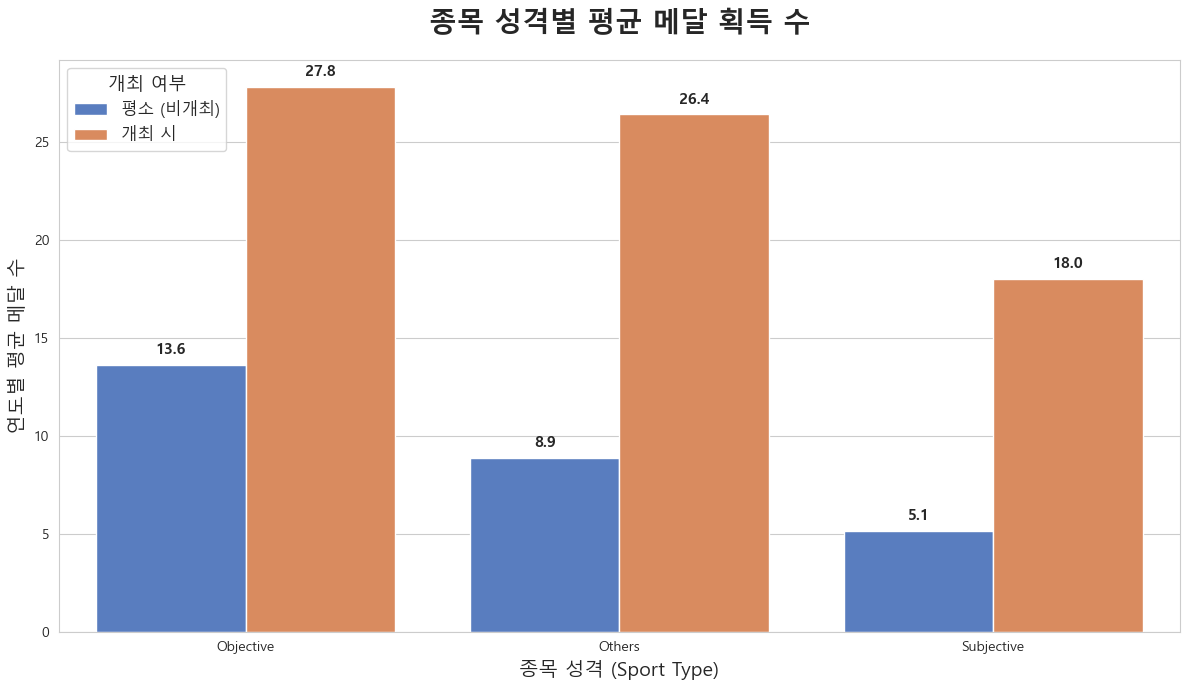

In [42]:
import matplotlib.font_manager as fm

sns.set_style("whitegrid")

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 시각화를 위해 데이터 구조 변경 (unstack 상태를 다시 시각화용으로)
# comparison_result는 이미 Is_Host와 Sport_Type으로 묶여있는 상태
plot_data = comparison_result.stack().reset_index(name='Avg_Medals')
plot_data['Is_Host'] = plot_data['Is_Host'].map({True: '개최 시', False: '평소 (비개최)'})

# 그래프 그리기
plt.figure(figsize=(12, 7))

# 그룹 막대 그래프
ax = sns.barplot(data=plot_data, x='Sport_Type', y='Avg_Medals', hue='Is_Host', palette='muted')

# 막대 위에 수치 표시 (가독성을 위해 정수형/소수점 1자리 조절)
for p in ax.patches:
    height = p.get_height()
    if height > 0: # 0보다 큰 경우만 표시
        ax.annotate(f'{height:.1f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 5),
                    textcoords='offset points',
                    fontsize=11, fontweight='bold')

# 제목 및 축 레이블 설정
plt.title('종목 성격별 평균 메달 획득 수', fontsize=20, pad=20, fontweight='bold')
plt.xlabel('종목 성격 (Sport Type)', fontsize=14)
plt.ylabel('연도별 평균 메달 수', fontsize=14)

# 범례 위치 최적화
plt.legend(title='개최 여부', fontsize=12, title_fontsize=13, loc='upper left')

plt.tight_layout() # 레이아웃 겹침 방지
plt.show()